In [1]:
# ASOS data (5 min)
# Get reanalysis (hourly)
# load dataset and combine
# Correlation between reanalysis and observation

In [45]:
import pandas as pd
import xarray as xr
import metpy.calc as mpcalc
from metpy.units import units
import matplotlib.pyplot as plt
import glob

In [46]:
!pwd

/home/jovyan


In [64]:
# read data
path = '/home/jovyan/'
path2 = '/home/jovyan/Reanalysis data_2017/'
file1 = 'EYW_NEW.csv'
file2 = 'ERA5_TMP_EYW_DATA.nc'
asos_data = pd.read_csv(path + file1, na_values = '999')

<Axes: >

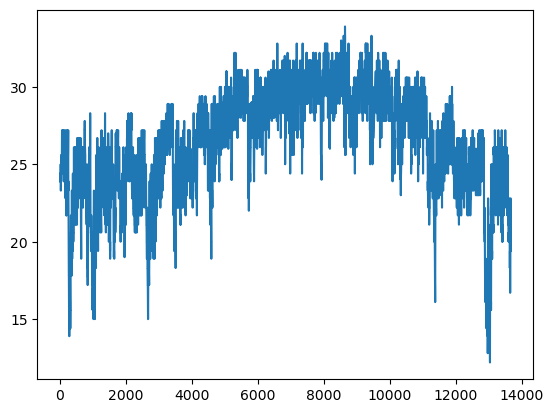

In [48]:
asos_data['TMP'] = asos_data['TMP'].str.replace('+', '')

asos_data['TMP'] = asos_data['TMP'].str.replace(',', '.')

asos_data['TMP'] = asos_data['TMP'].str[1:]

asos_data['NTMP'] = asos_data['TMP'].str.split('.').str[0]

asos_data['NTMP'] = asos_data['TMP'].str[0:2] + str('.') + asos_data['TMP'].str[2]

asos_data = asos_data.astype({'NTMP': float}, errors = 'ignore')

asos_data[asos_data['NTMP'] < 60]['NTMP'].plot()

In [49]:
asos_data['NTMP']

0        23.9
1        23.9
2        24.4
3        24.4
4        24.4
         ... 
13660    21.1
13661    21.1
13662    21.1
13663    20.0
13664    19.4
Name: NTMP, Length: 13665, dtype: float64

In [50]:
#asos_data
asos_data['DATE'] = pd.to_datetime(asos_data['DATE'],format='%Y-%m-%dT%H:%M:%S') #converting time column to pandas datetime column
asos_data = asos_data.set_index('DATE') # sets identifying column

In [51]:
#asos_data
#asos_data['TMP']
asos_data.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:53:00',
               '2017-01-01 01:53:00', '2017-01-01 02:53:00',
               '2017-01-01 03:00:00', '2017-01-01 03:53:00',
               '2017-01-01 04:53:00', '2017-01-01 04:59:00',
               '2017-01-01 04:59:00', '2017-01-01 05:53:00',
               ...
               '2017-12-31 18:53:00', '2017-12-31 19:53:00',
               '2017-12-31 20:53:00', '2017-12-31 21:00:00',
               '2017-12-31 21:20:00', '2017-12-31 21:27:00',
               '2017-12-31 21:41:00', '2017-12-31 21:53:00',
               '2017-12-31 22:53:00', '2017-12-31 23:53:00'],
              dtype='datetime64[ns]', name='DATE', length=13665, freq=None)

<Axes: xlabel='DATE'>

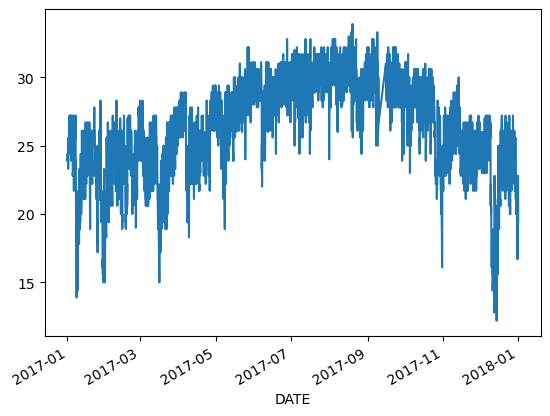

In [52]:
asos_data[asos_data['NTMP'] < 60]['NTMP'].plot()

In [53]:
asos_data.keys()

Index(['STATION', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME',
       'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG', 'VIS',
       'TMP', 'DEW', 'SLP', 'AA1', 'AA2', 'AA3', 'AB1', 'AD1', 'AE1', 'AH1',
       'AH2', 'AH3', 'AH4', 'AH5', 'AH6', 'AI1', 'AI2', 'AI3', 'AI4', 'AI5',
       'AI6', 'AT1', 'AT2', 'AT3', 'AT4', 'AT5', 'AU1', 'AU2', 'AU3', 'AW1',
       'AW2', 'AW3', 'AW4', 'AX1', 'AX2', 'AX3', 'GA1', 'GA2', 'GA3', 'GD1',
       'GD2', 'GD3', 'GE1', 'GF1', 'KA1', 'KA2', 'KB1', 'KB2', 'KB3', 'KC1',
       'KC2', 'KD1', 'KD2', 'KE1', 'KG1', 'KG2', 'MA1', 'MD1', 'MF1', 'MG1',
       'MH1', 'MK1', 'MV1', 'MW1', 'OC1', 'OD1', 'OE1', 'OE2', 'OE3', 'RH1',
       'RH2', 'RH3', 'REM', 'EQD', 'NTMP'],
      dtype='object')

In [54]:
# Convert from 5 min data to hourly data

asos_without_station = asos_data.drop(['STATION', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL',
                                      'WND', 'CIG', 'VIS', 'DEW'], axis = 1) #drops string values 
#asos_without_station

asos_hourly_data = asos_without_station['NTMP'].resample('1h').mean()

In [62]:
#asos_hourly_data.mean()
asos_hourly_data = asos_hourly_data[asos_hourly_data < 60]

<Axes: xlabel='DATE'>

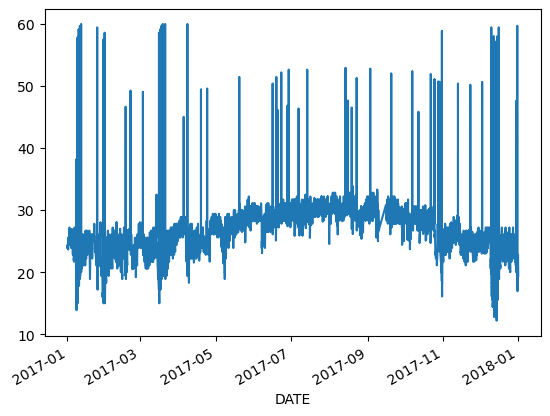

In [63]:
asos_hourly_data.plot() #plot data

In [ ]:
# read ncdf

EYW_reanalysis = xr.open_dataset(path2 + file2)

In [ ]:
EYW_reanalysis

In [ ]:
#sleecting nearest pt to asos

EYW_reanalysis_lat_lon = EYW_reanalysis.sel(longitude = -81.7596, latitude = 24.5561, method = 'nearest')

In [ ]:
EYW_reanalysis_lat_lon

In [ ]:
EYW_reanalysis_tabular = EYW_reanalysis_lat_lon.to_dataframe()#.drop(['z','r','t'], axis = 1) Used if we have each variable

In [ ]:
EYW_reanalysis_tabular

In [ ]:
final_frame = EYW_reanalysis_tabular.reset_index().set_index('valid_time').drop(['latitude', 'longitude', 'number', 'expver'], axis = 1) #resetting index
final_frame

In [ ]:
#final_frame['u']
#final_frame['v']

In [ ]:
#combining datasets
#calculate wind speed from u and v components

u_wind_era = final_frame['u10'].values * units('m/s')

#u_wind_era

v_wind_era = final_frame['v10'].values * units('m/s')

wind_speed_era = mpcalc.wind_speed(u = u_wind_era, v = v_wind_era)
#wind_speed_era

In [ ]:
wind_direction_era = mpcalc.wind_direction(u = u_wind_era, v = v_wind_era)
#wind_direction_era

In [ ]:
#Adding new wind speed and direction to dataframe final_frame

final_frame['wind_speed_era'] = wind_speed_era

final_frame['wind_direction_era'] = wind_direction_era

final_frame

In [ ]:
# comparing both datasets from ASOS and era5

combined_dataset = pd.merge(asos_hourly_data, final_frame, left_index = True, right_index= True, how = 'inner')

combined_dataset

In [ ]:
combined_dataset['ASOS_wndspd_mps'] = combined_dataset['sknt'] * 1.9
combined_dataset

In [ ]:
corr_coef = combined_dataset['ASOS_wndspd_mps'].corr(combined_dataset['wind_speed_era']) #correlation coefficient


In [ ]:
correlation_percentage = (corr_coef * corr_coef) * 100 #find correlation percentage

print(f'{correlation_percentage} %')

In [ ]:
combined_dataset[['ASOS_wndspd_mps', 'wind_speed_era']].plot(title = 'ASOS VS Reanalysis Windspeed Comparison')
plt.savefig('Line_compare_ASOS_ERA5.png',dpi=150)

In [ ]:
combined_dataset[['ASOS_wndspd_mps', 'wind_speed_era']].plot(x = 'ASOS_wndspd_mps', y = 'wind_speed_era', kind = 'scatter')

In [ ]:
fig, ax = plt.subplots() #create a figure and axis object to control the plots

combined_dataset['ASOS_wndspd_mps'].hist(ax = ax, color = 'r', label = 'ASOS Wind Speed')
combined_dataset['wind_speed_era'].hist(ax = ax, color = 'b', alpha = 0.5, label = 'Wind Speed ERA5')

ax.legend()

ax.set_xlabel(r'Wind Speed $ m s^{-1} $')

ax.set_title('Wind Speed Comparison between ASOS & ERA5 (KEYW)')
plt.savefig('Windspeed_compare_ASOS_ERA5.png',dpi=150)